## volumetric rate model

The total (integrated) Iax rate should be 20% of the SN Ia rate at z = 0. The rate should change with redshift following the star formation rate, as these are a young population of supernovae.

## luminosity function

The absolute V band magnitude should be sampled from this distribution.

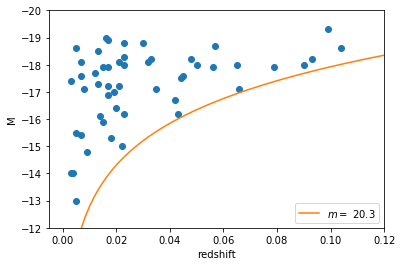

In [205]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

sn, host, refs = np.genfromtxt('jha2017-table1.csv', delimiter=',',skip_header=1,
                             dtype='unicode',unpack=True,usecols=(0,1,4))
z, M = np.genfromtxt('jha2017-table1.csv', delimiter=',',skip_header=1,
                             unpack=True,usecols=(2,3))

plt.plot(z,M,marker='o',linestyle="None")
plt.ylim(-12,-20)
plt.xlim(-0.005,0.12)
plt.xlabel('redshift')
plt.ylabel('M')

from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
cosmo = FlatLambdaCDM(H0=73.0, Om0=0.3)
zz = np.linspace(0.001,0.15,100)
mu = 5.0 * np.log10(cosmo.luminosity_distance(zz)/u.Mpc) + 25.0

mlim = 20.3
plt.plot(zz,mlim-mu,label=r"$m =$ " + "{:.1f}".format(mlim))
plt.legend(loc="lower right")
plt.show()

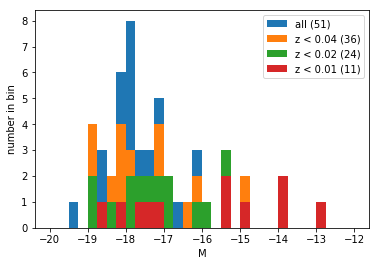

In [183]:
z1 = (z < 0.01)
z2 = (z < 0.02)
z4 = (z < 0.04)

n, b, p = plt.hist(M,label='all ({:d})'.format(len(M)),bins=32,range=[-20,-12])
plt.hist(M[z4],label='z < 0.04 ({:d})'.format(sum(z4)),bins=b)
plt.hist(M[z2],label='z < 0.02 ({:d})'.format(sum(z2)),bins=b)
plt.hist(M[z1],label='z < 0.01 ({:d})'.format(sum(z1)),bins=b)
plt.legend()
plt.xlabel('M')
plt.ylabel('number in bin')
plt.show()

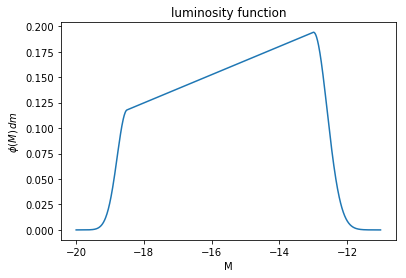

In [251]:
dx = 0.01
x = np.arange(-20,-11,dx)
nx = len(x)

# we approximate the luminosity function as linear, with
# Gaussian rolloffs at either end

# bright end rolloff
brightroll = -18.5
brightsig = 0.3

# faint end rolloff
faintroll = -13.0
faintsig = 0.4

# linear part
y = (x+19.0)/8. + 1.0

lx = (x < brightroll)
y[lx] *= np.exp(-(x[lx]-brightroll)**2/2.0/brightsig**2)
rx = (x > faintroll)
y[rx] *= np.exp(-(x[rx]-faintroll)**2/2.0/faintsig**2)
y /= np.sum(y)*dx

plt.plot(x,y)
plt.title('luminosity function')
plt.xlabel('M')
plt.ylabel(r'$\phi(M)\,dm$')
plt.show()

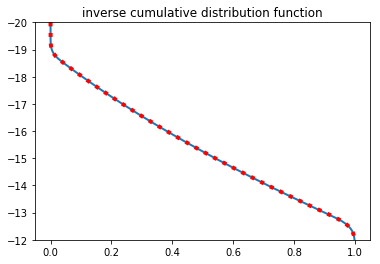

In [255]:
# to sample from this luminosity function 
# we calculate the cumulative distribution function
# and invert it via linear interpolation

cdf = np.cumsum(y)*dx
uy = np.arange(0,1,0.0001)
invcdf = np.interp(uy,cdf,x)

# plot it up and compare the interpolation
plt.plot(uy,invcdf,linewidth=2)
plt.plot(cdf,x,linestyle=':',linewidth=4,color='r')
plt.ylim(-12,-20)
plt.title('inverse cumulative distribution function')
plt.show()

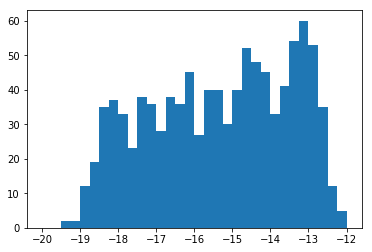

fraction brighter than -17.5:  0.151


In [256]:
# once we have the invcdf we can just interpolate it
# with random uniform deviates to get our samples
ssize = 1000
unif = np.random.random(size=ssize)
Msamp = np.interp(unif,uy,invcdf)

plt.hist(Msamp,bins=32,range=[-20,-12])
plt.show()

print("fraction brighter than -17.5: ",sum(samples < -17.5)/len(samples))

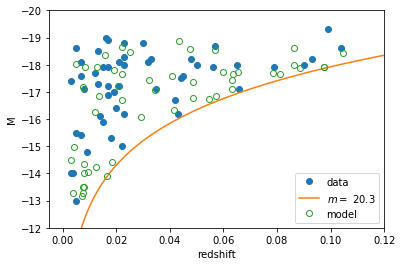

In [260]:
# simulate a uniform redshift distribution
ssize = len(M)*20
unif = np.random.random(size=ssize)
Msamp = np.interp(unif,uy,invcdf)
zsamp = np.random.random(size=ssize)*0.12 + 0.001
musamp = 5.0 * np.log10(cosmo.luminosity_distance(zsamp)/u.Mpc) + 25.0
m = Msamp + musamp

detected = (m < mlim)
zdet = zsamp[detected]
Mdet = Msamp[detected]

# cut to same number as data
zmodel = zdet[:len(M)]
Mmodel = Mdet[:len(M)]
assert len(Mmodel) == len(M), "Not enough samples generated"

plt.plot(z,M,marker='o',linestyle="None",label='data')
plt.ylim(-12,-20)
plt.xlim(-0.005,0.12)
plt.xlabel('redshift')
plt.ylabel('M')
plt.plot(zz,mlim-mu,label=r"$m =$ " + "{:.1f}".format(mlim))
plt.plot(zmodel,Mmodel,marker='o',linestyle="none",
        fillstyle="none",label='model')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# do histogram version of the above